<a href="https://colab.research.google.com/github/shfiq1/DeepLearningWithTensorflow/blob/main/theft_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
Theft_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/theft_data.csv')

In [ ]:
theft_count = pd.DataFrame(Theft_data.groupby(['YEAR','MONTH']).size().rename('counts').reset_index())

In [ ]:
theft_count

,YEAR,MONTH,counts
0,2003,1,247
1,2003,2,219
2,2003,3,208
3,2003,4,235
4,2003,5,223
...,...,...,...
170,2017,3,487
171,2017,4,439
172,2017,5,436
173,2017,6,455


In [ ]:
dataset=theft_count['counts']

In [ ]:
dataset

0      247
1      219
2      208
3      235
4      223
      ... 
170    487
171    439
172    436
173    455
174    172
Name: counts, Length: 175, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#from keras.callbacks import EarlyStopping
from keras.layers import ConvLSTM2D

In [ ]:
dataset=pd.DataFrame(dataset)

In [ ]:
data = dataset.values

In [ ]:
data = data.astype('float32')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
scaler=scaler.fit(data)

In [ ]:
dataset=scaler.fit_transform(data)

In [ ]:
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
train.shape

(115, 1)

In [ ]:
test.shape

(60, 1)

In [ ]:
#train=scaler.fit_transform(train)

In [ ]:
#test=scaler.fit_transform(test)

In [ ]:
length=len(dataset)

In [ ]:
length

175

In [ ]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])

    return np.array(x),np.array(y)


In [ ]:
seq_size = 13

In [ ]:
trainx,trainy=to_sequences(train,seq_size)
testx,testy=to_sequences(test,seq_size)


In [ ]:
trainy.shape

(101,)

In [ ]:
testy.shape

(46,)

In [ ]:
testx.shape

(46, 13)

In [ ]:
trainx.shape

(101, 13)

In [ ]:
trainx

array([[0.21989527, 0.14659688, 0.11780104, ..., 0.10209426, 0.15183249,
        0.1963351 ],
       [0.14659688, 0.11780104, 0.18848166, ..., 0.15183249, 0.1963351 ,
        0.31413612],
       [0.11780104, 0.18848166, 0.15706804, ..., 0.1963351 , 0.31413612,
        0.31151834],
       ...,
       [0.46858642, 0.42931935, 0.3089005 , ..., 0.39267018, 0.38219896,
        0.38219896],
       [0.42931935, 0.3089005 , 0.36125657, ..., 0.38219896, 0.38219896,
        0.34031412],
       [0.3089005 , 0.36125657, 0.40837696, ..., 0.38219896, 0.34031412,
        0.35602096]], dtype=float32)

In [ ]:
trainx = np.reshape(trainx, (trainx.shape[0],1, trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0],1, testx.shape[1]))

In [ ]:
trainx.shape

(101, 1, 13)

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(128,input_shape=(None,seq_size),return_sequences=True))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         72704     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 124,225
Trainable params: 124,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainx,trainy,validation_data=(testx,testy),verbose=2,epochs=100)

Epoch 1/100
4/4 - 8s - loss: 0.0721 - val_loss: 0.2996 - 8s/epoch - 2s/step
Epoch 2/100
4/4 - 0s - loss: 0.0413 - val_loss: 0.1789 - 37ms/epoch - 9ms/step
Epoch 3/100
4/4 - 0s - loss: 0.0163 - val_loss: 0.0724 - 38ms/epoch - 9ms/step
Epoch 4/100
4/4 - 0s - loss: 0.0085 - val_loss: 0.0201 - 36ms/epoch - 9ms/step
Epoch 5/100
4/4 - 0s - loss: 0.0123 - val_loss: 0.0214 - 39ms/epoch - 10ms/step
Epoch 6/100
4/4 - 0s - loss: 0.0101 - val_loss: 0.0438 - 36ms/epoch - 9ms/step
Epoch 7/100
4/4 - 0s - loss: 0.0075 - val_loss: 0.0668 - 38ms/epoch - 9ms/step
Epoch 8/100
4/4 - 0s - loss: 0.0077 - val_loss: 0.0748 - 36ms/epoch - 9ms/step
Epoch 9/100
4/4 - 0s - loss: 0.0078 - val_loss: 0.0689 - 38ms/epoch - 9ms/step
Epoch 10/100
4/4 - 0s - loss: 0.0075 - val_loss: 0.0568 - 39ms/epoch - 10ms/step
Epoch 11/100
4/4 - 0s - loss: 0.0072 - val_loss: 0.0445 - 41ms/epoch - 10ms/step
Epoch 12/100
4/4 - 0s - loss: 0.0072 - val_loss: 0.0392 - 35ms/epoch - 9ms/step
Epoch 13/100
4/4 - 0s - loss: 0.0070 - val_loss: 

In [ ]:
trainPredict=model.predict(trainx)
testPredict=model.predict(testx)

In [ ]:
from sklearn import metrics

In [ ]:
trainPredict.shape

(101, 1)

In [ ]:
testPredict.shape

(46, 1)

In [ ]:
testy.shape

(46,)

In [ ]:
trainPredict=scaler.inverse_transform(trainPredict)
trainy=scaler.inverse_transform([trainy])
testPredict=scaler.inverse_transform(testPredict)
testy=scaler.inverse_transform([testy])

In [ ]:
#testys=testy.reshape(49,1)

In [ ]:
#testpred=testPredict.reshape(49,1)

In [ ]:
#metrics.r2_score(testys,testpred)

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 25.26 RMSE


In [ ]:
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 45.62 RMSE


In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict


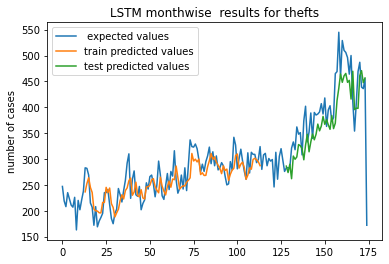

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
#plt.xlabel('time')
plt.ylabel('number of cases')
plt.title('LSTM monthwise  results for thefts')
plt.legend([" expected values", "train predicted values","test predicted values"])
plt.show()